# NOTES

In [1]:
using Plots
using StatsBase
using Distributions
using StatsFuns
using KernelDensity
using Statistics
using StatsPlots
using CSV
using DataFrames
using Measures
using LaTeXStrings

In [2]:
function characteristics(X)
    l = length(X)
    Q2 = quantile!(X, 0.5)
    Q1 = quantile!(X, 0.25)
    Q3 = quantile!(X, 0.75)
    r = sort(X)[end] - sort(X)[1]
    IQR = Q3 - Q1
    σ2 = var(X)
    σ = sqrt(σ2)
    CV = σ/mean(X)
    println("Q2 = ", Q2)
    println("Q1 = ", Q1)
    println("Q3 = ", Q3)
    println("r = ", r)
    println("IQR = ", IQR)
    println("σ² = ", σ2)
    println("σ = ", σ)
    println("CV = ", CV)
end

function average(data, k, show=false)
    mean = sum(data)/length(data)
    harmonic = length(data)/sum(1 ./ data)
    geometric = prod(abs.(data).^(1/length(data)))
    cut = 1/(length(data) - 2*k) * sum(sort(data)[k+1:end-k])
    winsor = 1/length(data) * ( (k+1)*sort(data)[k+1] + sum(sort(data)[k+2:end-k-1]) + (k+1)*sort(data)[end-k] )
    
    if show
        println("Arytmetyczna: ", mean)
        println("Harmoniczna: ", harmonic)
        println("Geometryczna: ", geometric)
        println("Ucinana: ", cut)
        println("Winsorowska: ", winsor)
    end
    
    return([mean, harmonic, geometric, cut, winsor])
end

function correlation(X, Y)
    n = length(X)
    return ( sum(X .* Y) - n * mean(X) * mean(Y) ) / ( (n - 1) * std(X) * std(Y) )
end

correlation (generic function with 1 method)

In [4]:
file = open("zad1.txt")
data1 = readlines(file)
close(file)
data1 = parse.(Float64, data1)

file = open("zad2.txt")
data2 = readlines(file)
close(file)
data2 = parse.(Float64, data2)

1000-element Vector{Float64}:
  0.58043877
  1.7424336
  1.6003524
 -0.26076264
  0.033104937
  1.1425029
  0.3545687
  1.659644
 -0.68217604
  0.80588761
  0.5703826
  1.9878699
 -1.5283286
  ⋮
 -0.066535028
  0.63706808
 -0.43983664
 -1.6258145
 -0.1478157
  0.76475749
 -0.45015345
 -0.036799592
  0.71637708
  0.89265122
 -0.74231755
 -0.14473006

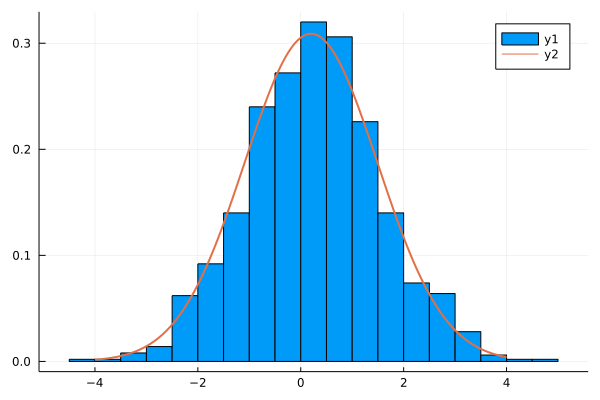

In [99]:
histogram(data2, normed=true)
xs = -4:0.01:4
#plot!(xs, pdf.(Normal(0.2, sqrt(1.5)), xs), width=2)
plot!(xs, pdf.(Normal(0.2, std(data2)), xs), width=2)

## Statystyki

In [19]:
n = 1000
α = 0.05
μ = 0.2
σ₀ = sqrt(1.5)
X = sum((data2 .- μ).^2) / σ₀^2

println("X = ", X)
println("x = ", quantile(Chisq(n), α/2))
println("p-wartość = ", 2 - 2 * cdf(Chisq(n), X))

X = 1112.5799143935767
x = 914.257153799259
p-wartość = 0.014548621112804305


In [41]:
n = 1000
α = 0.05
μ = 0.2
σ₀ = sqrt(1.5)
X = sum((data2 .- μ).^2) / σ₀^2

println("X = ", X)
println("x = ", quantile(Chisq(n), α))
println("p-wartość = ", cdf(Chisq(n), X))

X = 1112.5799143935767
x = 927.594363020979
p-wartość = 0.9927256894435978


## Wykresy

### Średnia

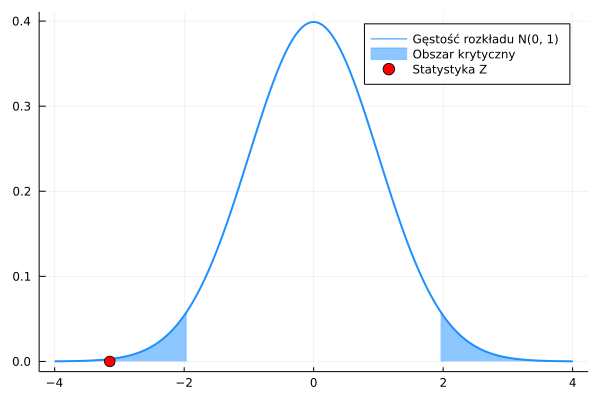

In [169]:
xs = -4:0.01:4
plot(xs, pdf.(Normal(0, 1), xs), color=:dodgerblue, width=2, label="Gęstość rozkładu N(0, 1)")

xs_ = 1.96:0.01:4
plot!(xs_, pdf.(Normal(0, 1), xs_), fillrange=zeros(length(xs_)), color=:dodgerblue, alpha=0.5, label="Obszar krytyczny")
xs_ = -4:0.01:-1.96
plot!(xs_, pdf.(Normal(0, 1), xs_), fillrange=zeros(length(xs_)), color=:dodgerblue, alpha=0.5, label=false)

scatter!([-3.149], [0], color=:red, markersize=6, label="Statystyka Z") |> display

plt = plot!(dpi=500)
savefig(plt, "images/srednia_a")

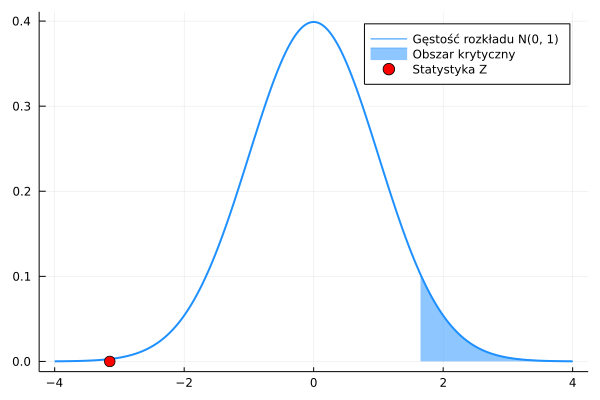

In [170]:
xs = -4:0.01:4
plot(xs, pdf.(Normal(0, 1), xs), color=:dodgerblue, width=2, label="Gęstość rozkładu N(0, 1)")

xs_ = 1.65:0.01:4
plot!(xs_, pdf.(Normal(0, 1), xs_), fillrange=zeros(length(xs_)), color=:dodgerblue, alpha=0.5, label="Obszar krytyczny")

scatter!([-3.149], [0], color=:red, markersize=6, label="Statystyka Z") |> display

plt = plot!(dpi=500)
savefig(plt, "images/srednia_b")

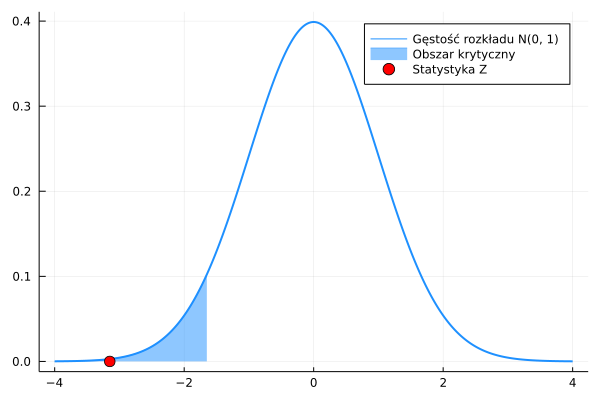

In [171]:
xs = -4:0.01:4
plot(xs, pdf.(Normal(0, 1), xs), color=:dodgerblue, width=2, label="Gęstość rozkładu N(0, 1)")

xs_ = -4:0.01:-1.65
plot!(xs_, pdf.(Normal(0, 1), xs_), fillrange=zeros(length(xs_)), color=:dodgerblue, alpha=0.5, label="Obszar krytyczny")

scatter!([-3.149], [0], color=:red, markersize=6, label="Statystyka Z") |> display

plt = plot!(dpi=500)
savefig(plt, "images/srednia_c")

In [173]:
quantile(Normal(0, 1), 1 - α/2)

1.9599639845400576

### Wariancja

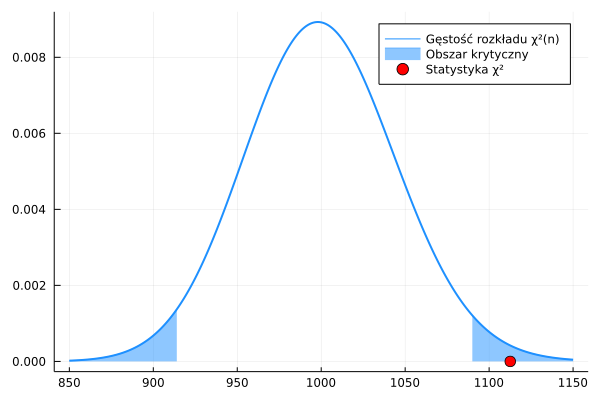

In [123]:
xs = 850:1:1150
plot(xs, pdf.(Chisq(n), xs), color=:dodgerblue, width=2, label="Gęstość rozkładu χ²(n)")

xs_ = 1090:1:1150
plot!(xs_, pdf.(Chisq(n), xs_), fillrange=zeros(length(xs_)), color=:dodgerblue, alpha=0.5, label="Obszar krytyczny")
xs_ = 850:1:914
plot!(xs_, pdf.(Chisq(n), xs_), fillrange=zeros(length(xs_)), color=:dodgerblue, alpha=0.5, label=false)

scatter!([1112.58], [0], color=:red, markersize=6, label="Statystyka χ²") |> display

plt = plot!(dpi=500)
savefig(plt, "images/wariancja_a")

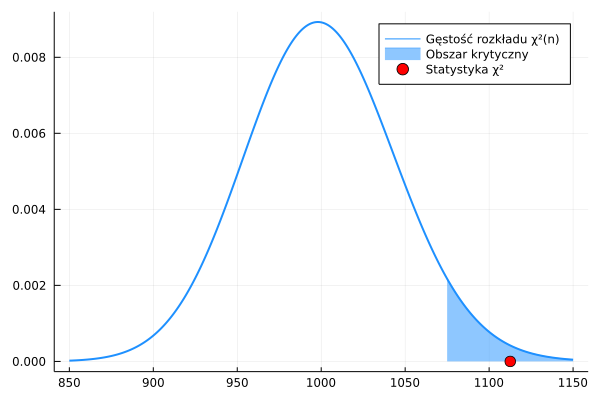

In [122]:
xs = 850:1:1150
plot(xs, pdf.(Chisq(n), xs), color=:dodgerblue, width=2, label="Gęstość rozkładu χ²(n)")

xs_ = 1075:1:1150
plot!(xs_, pdf.(Chisq(n), xs_), fillrange=zeros(length(xs_)), color=:dodgerblue, alpha=0.5, label="Obszar krytyczny")

scatter!([1112.58], [0], color=:red, markersize=6, label="Statystyka χ²") |> display

plt = plot!(dpi=500)
savefig(plt, "images/wariancja_b")

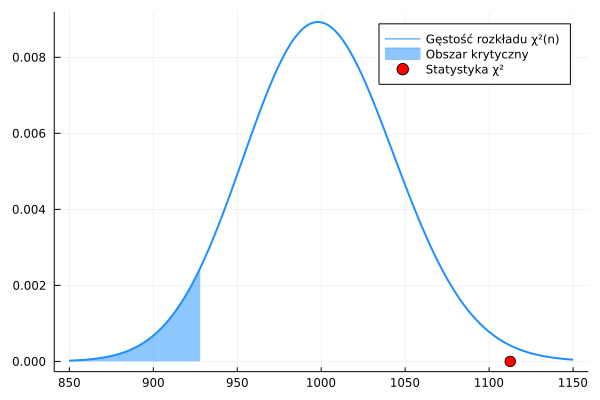

In [124]:
xs = 850:1:1150
plot(xs, pdf.(Chisq(n), xs), color=:dodgerblue, width=2, label="Gęstość rozkładu χ²(n)")

xs_ = 850:1:928
plot!(xs_, pdf.(Chisq(n), xs_), fillrange=zeros(length(xs_)), color=:dodgerblue, alpha=0.5, label="Obszar krytyczny")

scatter!([1112.58], [0], color=:red, markersize=6, label="Statystyka χ²") |> display

plt = plot!(dpi=500)
savefig(plt, "images/wariancja_c")

## Symulacja

### Wariancja

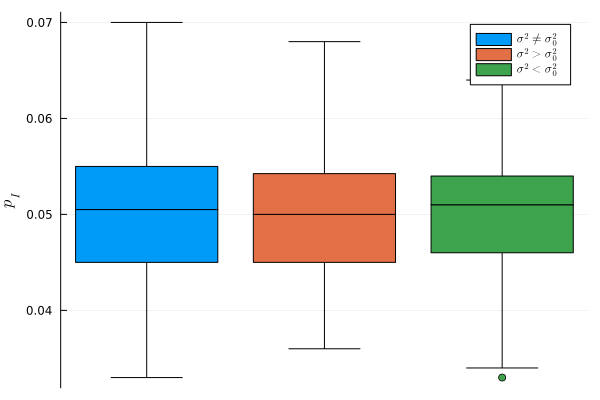

In [20]:
n = 1000
α = 0.05
μ = 0.2
σ₀ = sqrt(1.5)

for j in 1:100
    Ha = 0
    Hb = 0
    Hc = 0
    N = 1000

    for i in 1:N
        Xi = rand(Normal(0.2, σ₀), n)
        X = sum((Xi .- μ).^2) / σ₀^2
        Ha += X < quantile(Chisq(n), α/2) || X > quantile(Chisq(n), 1 - α/2)
        Hb += X > quantile(Chisq(n), 1 - α)
        Hc += X < quantile(Chisq(n), α)
    end

    append!(Ha_, Ha/N)
    append!(Hb_, Hb/N)
    append!(Hc_, Hc/N)
end

boxplot(Ha_, label=L"\sigma^2 \neq \sigma_0^2", xticks=false, xaxis=false, ylabel=L"p_{I}")
boxplot!(Hb_, label=L"\sigma^2 > \sigma_0^2")
boxplot!(Hc_, label=L"\sigma^2 < \sigma_0^2") |> display

plt = plot!(dpi=500)
savefig(plt, "images/boxplot_wariancja")

In [158]:
n = 1000
α = 0.05
μ = 0.2
σ₀ = sqrt(1.5)
σ = sqrt(1.5 + 0.02)

Ha = 0
Hb = 0
Hc = 0
N = 1000

for i in 1:N
    Xi = rand(Normal(0.2, σ), n)
    X = sum((Xi .- μ).^2) / σ₀^2
    Ha += X > quantile(Chisq(n), α/2) && X < quantile(Chisq(n), 1 - α/2)
    Hb += X < quantile(Chisq(n), 1 - α)
    Hc += X > quantile(Chisq(n), α)
end

println("Ha: ", Ha/N)
println("Hb: ", Hb/N)
println("Hc: ", Hc/N)

Ha: 0.927
Hb: 0.891
Hc: 0.975


### Srednia

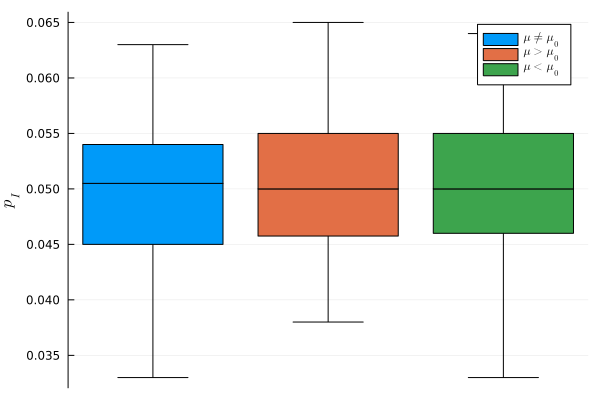

In [19]:
n = 1000
α = 0.05
μ₀ = 1.5
σ = sqrt(0.2)

Ha_ = Float64[]
Hb_ = Float64[]
Hc_ = Float64[]

for j in 1:100
    Ha = 0
    Hb = 0
    Hc = 0
    N = 1000

    for i in 1:N
        Xi = rand(Normal(μ₀, σ), n)
        Z = (mean(Xi) - μ₀) / (σ/sqrt(n))
        Ha += Z < quantile(Normal(0, 1), α/2) || Z > quantile(Normal(0, 1), 1 - α/2)
        Hb += Z > quantile(Normal(0, 1), 1 - α)
        Hc += Z < quantile(Normal(0, 1), α)
    end

    append!(Ha_, Ha/N)
    append!(Hb_, Hb/N)
    append!(Hc_, Hc/N)
end

boxplot(Ha_, label=L"\mu \neq \mu_0", xticks=false, xaxis=false, ylabel=L"p_{I}")
boxplot!(Hb_, label=L"\mu > \mu_0")
boxplot!(Hc_, label=L"\mu < \mu_0") |> display

plt = plot!(dpi=500)
savefig(plt, "images/boxplot_srednia")


In [193]:
n = 1000
α = 0.05
μ = 1.5 + 0.01
μ₀ = 1.5
σ = sqrt(0.2)

Ha = 0
Hb = 0
Hc = 0
N = 1000

for i in 1:N
    Xi = rand(Normal(μ, σ), n)
    Z = (mean(Xi) - μ₀) / (σ/sqrt(n))
    Ha += Z > quantile(Normal(0, 1), α/2) && Z < quantile(Normal(0, 1), 1 - α/2)
    Hb += Z < quantile(Normal(0, 1), 1 - α)
    Hc += Z > quantile(Normal(0, 1), α)
end

println("Ha: ", Ha/N)
println("Hb: ", Hb/N)
println("Hc: ", Hc/N)

Ha: 0.897
Hb: 0.83
Hc: 0.991


In [196]:
Ha_ = [0.931, 0.951, 0.947, 0.922, 0.952, 0.927]
Hb_ = [0, 0, 0, 0.92, 0.925, 0.891]
Hc_ = [0.891, 0.921, 0.933, 0, 0, 0]

6-element Vector{Float64}:
 0.891
 0.921
 0.933
 0.0
 0.0
 0.0

In [204]:
1 .- Ha_ |> display
1 .- Hb_ |> display
1 .- Hc_ |> display

6-element Vector{Float64}:
 0.06899999999999995
 0.049000000000000044
 0.05300000000000005
 0.07799999999999996
 0.04800000000000004
 0.07299999999999995

6-element Vector{Float64}:
 1.0
 1.0
 1.0
 0.07999999999999996
 0.07499999999999996
 0.10899999999999999

6-element Vector{Float64}:
 0.10899999999999999
 0.07899999999999996
 0.06699999999999995
 1.0
 1.0
 1.0

In [126]:
1/n * sum((data2 .- μ).^2) |> display
var(data2)

1.6688698715903647

1.6681207941464065